In [24]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import numpy as np
import seaborn as sns

In [25]:
data = pd.read_csv("subs/all_subs.csv")
data["Event_Coach"] = data["Event_Coach"].str.replace(" ", "")  # in case of unnecessary spaces in front of or after names
total_sub_count = len(data)
data

,Match_Index,Team_Home,Team_Away,Minute,Sub_Number,Event_Team,Goals_Home,Goals_Away,Current_Points,Final_Points,Event_Coach
0,4721495,Gladbach,Bayern,64,1,Gladbach,1,1,1,1,Hütter
1,4721495,Gladbach,Bayern,64,2,Gladbach,1,1,1,1,Hütter
2,4721495,Gladbach,Bayern,72,3,Gladbach,1,1,1,1,Hütter
3,4721495,Gladbach,Bayern,75,1,Bayern,1,1,1,1,Nagelsmann
4,4721495,Gladbach,Bayern,75,2,Bayern,1,1,1,1,Nagelsmann
...,...,...,...,...,...,...,...,...,...,...,...
2085,4721737,Fürth,Freiburg,60,1,Fürth,0,0,1,1,Leitl
2086,4721737,Fürth,Freiburg,71,2,Fürth,0,0,1,1,Leitl
2087,4721737,Fürth,Freiburg,71,3,Fürth,0,0,1,1,Leitl
2088,4721737,Fürth,Freiburg,83,2,Freiburg,0,0,1,1,Streich


In [26]:
# calculate subs per game for every coach with at least 5 matches
match_ct =  []
temp = data.groupby("Event_Coach")
for coach, frame in temp:
    nmbr = len(pd.unique(frame["Match_Index"]))
    match_ct.append([coach, nmbr, len(frame)/nmbr])
match_tot = len(pd.unique(data["Match_Index"]))
match_ct.append(["Avg", match_tot , (len(data)/match_tot)/2])
match_df = pd.DataFrame(match_ct, columns=["Coach", "Matches", "Subs/Match"])
match_df = match_df.drop(match_df[match_df["Matches"]<5].index)
match_df

,Coach,Matches,Subs/Match
0,Baumgart,26,4.576923
2,Dardai,13,4.692308
3,Fischer,27,4.481481
5,Glasner,27,4.148148
7,Hoeneß,27,4.555556
8,Hütter,25,3.440000
10,Kohfeldt,18,4.055556
11,Korkut,13,4.076923
12,Kramer,26,4.500000
14,Leitl,27,4.037037


In [27]:
data = data.drop(data[data.Minute < 45].index)  # drop first half substitutions
data

,Match_Index,Team_Home,Team_Away,Minute,Sub_Number,Event_Team,Goals_Home,Goals_Away,Current_Points,Final_Points,Event_Coach
0,4721495,Gladbach,Bayern,64,1,Gladbach,1,1,1,1,Hütter
1,4721495,Gladbach,Bayern,64,2,Gladbach,1,1,1,1,Hütter
2,4721495,Gladbach,Bayern,72,3,Gladbach,1,1,1,1,Hütter
3,4721495,Gladbach,Bayern,75,1,Bayern,1,1,1,1,Nagelsmann
4,4721495,Gladbach,Bayern,75,2,Bayern,1,1,1,1,Nagelsmann
...,...,...,...,...,...,...,...,...,...,...,...
2085,4721737,Fürth,Freiburg,60,1,Fürth,0,0,1,1,Leitl
2086,4721737,Fürth,Freiburg,71,2,Fürth,0,0,1,1,Leitl
2087,4721737,Fürth,Freiburg,71,3,Fürth,0,0,1,1,Leitl
2088,4721737,Fürth,Freiburg,83,2,Freiburg,0,0,1,1,Streich


In [28]:
#data.groupby(["Event_Coach","Score"])

In [29]:
bycoach = data.groupby("Event_Coach")
bycoach.get_group("Streich")

,Match_Index,Team_Home,Team_Away,Minute,Sub_Number,Event_Team,Goals_Home,Goals_Away,Current_Points,Final_Points,Event_Coach
58,4721502,Bielefeld,Freiburg,62,1,Freiburg,0,0,1,1,Streich
60,4721502,Bielefeld,Freiburg,70,2,Freiburg,0,0,1,1,Streich
61,4721502,Bielefeld,Freiburg,70,3,Freiburg,0,0,1,1,Streich
65,4721502,Bielefeld,Freiburg,85,4,Freiburg,0,0,1,1,Streich
66,4721502,Bielefeld,Freiburg,85,5,Freiburg,0,0,1,1,Streich
...,...,...,...,...,...,...,...,...,...,...,...
1993,4721725,Freiburg,Wolfsburg,86,3,Freiburg,2,2,1,3,Streich
1994,4721725,Freiburg,Wolfsburg,90,4,Freiburg,3,2,3,3,Streich
2084,4721737,Fürth,Freiburg,58,1,Freiburg,0,0,1,1,Streich
2088,4721737,Fürth,Freiburg,83,2,Freiburg,0,0,1,1,Streich


In [30]:
bycoach.get_group("Streich").iloc[0]["Event_Team"]

'Freiburg'

In [31]:
bymatches = data.groupby("Match_Index")
bymatches.get_group(4721495)

,Match_Index,Team_Home,Team_Away,Minute,Sub_Number,Event_Team,Goals_Home,Goals_Away,Current_Points,Final_Points,Event_Coach
0,4721495,Gladbach,Bayern,64,1,Gladbach,1,1,1,1,Hütter
1,4721495,Gladbach,Bayern,64,2,Gladbach,1,1,1,1,Hütter
2,4721495,Gladbach,Bayern,72,3,Gladbach,1,1,1,1,Hütter
3,4721495,Gladbach,Bayern,75,1,Bayern,1,1,1,1,Nagelsmann
4,4721495,Gladbach,Bayern,75,2,Bayern,1,1,1,1,Nagelsmann
5,4721495,Gladbach,Bayern,82,3,Bayern,1,1,1,1,Nagelsmann
6,4721495,Gladbach,Bayern,82,4,Bayern,1,1,1,1,Nagelsmann
7,4721495,Gladbach,Bayern,90,4,Gladbach,1,1,1,1,Hütter


In [32]:
data.Minute.mean()

71.99262174126906

In [33]:
total_sub_count

2090

In [34]:
bysubs = data.groupby("Sub_Number")
bysubs.groups

{1: [0, 3, 8, 12, 18, 19, 25, 28, 34, 41, 45, 48, 49, 58, 59, 68, 72, 77, 80, 86, 87, 98, 108, 115, 123, 124, 133, 140, 143, 149, 150, 157, 166, 167, 174, 176, 182, 184, 191, 194, 199, 202, 207, 209, 217, 219, 223, 224, 231, 234, 241, 243, 251, 252, 258, 267, 270, 274, 275, 285, 298, 303, 304, 311, 312, 320, 323, 329, 331, 338, 345, 347, 355, 366, 371, 373, 379, 387, 388, 405, 407, 416, 425, 427, 433, 435, 443, 445, 451, 453, 460, 461, 469, 471, 476, 479, 486, 487, 496, 498, ...], 2: [1, 4, 9, 13, 20, 21, 26, 31, 35, 36, 42, 46, 50, 52, 60, 62, 69, 73, 78, 81, 88, 90, 97, 102, 105, 109, 114, 116, 125, 126, 132, 134, 141, 146, 151, 153, 158, 159, 168, 170, 175, 177, 183, 186, 192, 195, 200, 203, 208, 210, 218, 221, 225, 226, 232, 235, 242, 244, 253, 255, 259, 260, 268, 271, 276, 278, 286, 288, 295, 300, 305, 306, 313, 315, 321, 326, 330, 332, 337, 339, 346, 348, 356, 358, 363, 367, 372, 375, 380, 381, 389, 391, 398, 400, 406, 408, 417, 419, 426, 428, ...], 3: [2, 5, 10, 14, 22, 24, 27, 

In [35]:
def get_sub_data(coach_name, dframe):
    """
    calculates substitution statistics for given coach
    :param coach_name: name of coach
    :param dframe: substitutions of coach
    :return: list of statistics
    """
    team = "None"
    if coach_name != "Average":
        team = dframe.iloc[0]["Event_Team"]

    # general substitution statistics
    number_of_matches = len(dframe.groupby("Match_Index"))
    number_of_subs = len(dframe)
    if coach_name != "Average":
        subs_per_match = number_of_subs / number_of_matches
    else:
        subs_per_match = number_of_subs / (number_of_matches * 2)
    avg_sub_minute = dframe.Minute.mean()
    avg_curr_points = dframe["Current_Points"].mean()
    avg_final_points = dframe["Final_Points"].mean()
    avg_points_gained = (dframe["Final_Points"]-dframe["Current_Points"]).mean()

    result = [coach_name, team, number_of_matches, number_of_subs, subs_per_match, avg_sub_minute,avg_curr_points,avg_final_points,avg_points_gained]

    subs_group = dframe.groupby("Sub_Number")
    subs_list = subs_group.size().index.tolist()

    # statistics for substitution number
    for sub_number in [1,2,3,4,5]:
        if sub_number in subs_list:
            sub_frame = subs_group.get_group(sub_number)
            sub_n_count = len(sub_frame)
            n_subs_per_match = sub_n_count / number_of_matches
            avg_n_sub_minute = sub_frame.Minute.mean()
            avg_sub_points = sub_frame["Current_Points"].mean()
            avg_sub_points_gained = (sub_frame["Final_Points"]-sub_frame["Current_Points"]).mean()
            result.extend([sub_n_count, n_subs_per_match, avg_n_sub_minute, avg_sub_points, avg_sub_points_gained])
        else:
            result.extend([np.nan, np.nan, np.nan, np.nan, np.nan])

    points_group = dframe.groupby("Current_Points")
    points_list = points_group.size().index.tolist()

    # statistics for substitutions per game state (lead, draw, loss)
    for points in [3,1,0]:
        if points in points_list:
            points_frame = points_group.get_group(points)
            n_points_count = len(points_frame)
            n_points_count_percent = (n_points_count / number_of_subs) * 100
            avg_points_sub_minute = points_frame.Minute.mean()
            avg_points_gained_points_sub = points_frame["Final_Points"].mean() - points
            result.extend([n_points_count,n_points_count_percent,avg_points_sub_minute,avg_points_gained_points_sub])
        else:
            result.extend([np.nan, np.nan, np.nan, np.nan])

    return result

In [36]:
cols = ["Name", "Team","Matches","Subs","Subs/Match","Avg_Min","Avg_Pts_Current","Avg_Pts_Final","Avg_Pts_gained","Subs_1","Subs_1/Match","Subs_1_Avg_Min","Subs_1_Avg_Pts","Subs_1_Avg_Pts_gained","Subs_2","Subs_2/Match","Subs_2_Avg_Min","Subs_2_Avg_Pts","Subs_2_Avg_Pts_gained","Subs_3","Subs_3/Match","Subs_3_Avg_Min","Subs_3_Avg_Pts","Subs_3_Avg_Pts_gained","Subs_4","Subs_4/Match","Subs_4_Avg_Min","Subs_4_Avg_Pts","Subs_4_Avg_Pts_gained","Subs_5","Subs_5/Match","Subs_5_Avg_Min","Subs_5_Avg_Pts","Subs_5_Avg_Pts_gained","Subs_Leading","Subs_Leading%","Subs_Leading_Avg_Min","Subs_Leading_Avg_Pts_gained","Subs_drawing","Subs_drawing%","Subs_Drawing_Avg_Min","Subs_Drawing_Avg_Pts_gained","Subs_Loosing","Subs_Loosing%","Subs_Loosing_Avg_Min","Subs_Loosing_Avg_Pts_gained"]

to_df = [get_sub_data("Average",data)]
for coach, frame in bycoach:
    to_df.append(get_sub_data(coach, frame))

coach_data = pd.DataFrame(to_df, columns=cols)
coach_data.to_csv("coach_subs.csv", index=False)

In [37]:
coach_data = pd.read_csv("coach_subs.csv")
coach_data

,Name,Team,Matches,Subs,Subs/Match,Avg_Min,Avg_Pts_Current,Avg_Pts_Final,Avg_Pts_gained,Subs_1,...,Subs_Leading_Avg_Min,Subs_Leading_Avg_Pts_gained,Subs_drawing,Subs_drawing%,Subs_Drawing_Avg_Min,Subs_Drawing_Avg_Pts_gained,Subs_Loosing,Subs_Loosing%,Subs_Loosing_Avg_Min,Subs_Loosing_Avg_Pts_gained
0,Average,None,242,2033,4.200413,71.992622,1.363502,1.421545,0.058042,433.0,...,75.437173,-0.277487,480.0,23.610428,71.250000,0.325000,789.0,38.809641,69.108999,0.220532
1,Baumgart,Köln,26,116,4.461538,72.775862,1.206897,1.465517,0.258621,23.0,...,76.156250,-0.687500,44.0,37.931034,71.136364,0.818182,40.0,34.482759,71.875000,0.400000
2,Beierlorzer,Leipzig,1,4,4.000000,78.500000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,100.000000,78.500000,0.000000
3,Dardai,Hertha,13,57,4.384615,65.964912,1.333333,1.052632,-0.280702,9.0,...,71.125000,-1.000000,4.0,7.017544,70.500000,0.500000,29.0,50.877193,61.068966,0.206897
4,Fischer,Union,27,118,4.370370,74.050847,1.440678,1.381356,-0.059322,24.0,...,78.468085,-0.510638,29.0,24.576271,71.758621,0.482759,42.0,35.593220,70.690476,0.071429
5,Fotheringham,Hertha,1,5,5.000000,82.200000,3.000000,3.000000,0.000000,1.0,...,82.200000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Glasner,Frankfurt,27,109,4.037037,72.853211,1.357798,1.403670,0.045872,24.0,...,79.054054,-0.459459,37.0,33.944954,70.432432,0.486486,35.0,32.110092,68.857143,0.114286
7,Gruev,Bielefeld,1,2,2.000000,83.500000,0.000000,0.000000,0.000000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,100.000000,83.500000,0.000000
8,Hoeneß,Hoffenheim,27,118,4.370370,70.796610,1.330508,1.669492,0.338983,22.0,...,75.880952,0.000000,31.0,26.271186,65.774194,0.354839,45.0,38.135593,69.511111,0.644444
9,Hütter,Gladbach,25,81,3.240000,72.086420,1.209877,1.234568,0.024691,22.0,...,77.296296,-0.148148,17.0,20.987654,70.411765,0.176471,37.0,45.679012,69.054054,0.081081


In [38]:
coach_data = coach_data.drop(coach_data[coach_data["Matches"]<5].index)
coach_data

,Name,Team,Matches,Subs,Subs/Match,Avg_Min,Avg_Pts_Current,Avg_Pts_Final,Avg_Pts_gained,Subs_1,...,Subs_Leading_Avg_Min,Subs_Leading_Avg_Pts_gained,Subs_drawing,Subs_drawing%,Subs_Drawing_Avg_Min,Subs_Drawing_Avg_Pts_gained,Subs_Loosing,Subs_Loosing%,Subs_Loosing_Avg_Min,Subs_Loosing_Avg_Pts_gained
0,Average,None,242,2033,4.200413,71.992622,1.363502,1.421545,0.058042,433.0,...,75.437173,-0.277487,480.0,23.610428,71.250000,0.325000,789.0,38.809641,69.108999,0.220532
1,Baumgart,Köln,26,116,4.461538,72.775862,1.206897,1.465517,0.258621,23.0,...,76.156250,-0.687500,44.0,37.931034,71.136364,0.818182,40.0,34.482759,71.875000,0.400000
3,Dardai,Hertha,13,57,4.384615,65.964912,1.333333,1.052632,-0.280702,9.0,...,71.125000,-1.000000,4.0,7.017544,70.500000,0.500000,29.0,50.877193,61.068966,0.206897
4,Fischer,Union,27,118,4.370370,74.050847,1.440678,1.381356,-0.059322,24.0,...,78.468085,-0.510638,29.0,24.576271,71.758621,0.482759,42.0,35.593220,70.690476,0.071429
6,Glasner,Frankfurt,27,109,4.037037,72.853211,1.357798,1.403670,0.045872,24.0,...,79.054054,-0.459459,37.0,33.944954,70.432432,0.486486,35.0,32.110092,68.857143,0.114286
8,Hoeneß,Hoffenheim,27,118,4.370370,70.796610,1.330508,1.669492,0.338983,22.0,...,75.880952,0.000000,31.0,26.271186,65.774194,0.354839,45.0,38.135593,69.511111,0.644444
9,Hütter,Gladbach,25,81,3.240000,72.086420,1.209877,1.234568,0.024691,22.0,...,77.296296,-0.148148,17.0,20.987654,70.411765,0.176471,37.0,45.679012,69.054054,0.081081
11,Kohfeldt,Wolfsburg,18,71,3.944444,68.676056,1.408451,1.112676,-0.295775,16.0,...,69.586207,-0.689655,13.0,18.309859,66.000000,-0.230769,29.0,40.845070,68.965517,0.068966
12,Korkut,Hertha,13,52,4.000000,70.230769,0.865385,0.788462,-0.076923,12.0,...,79.500000,-0.200000,15.0,28.846154,74.133333,-0.133333,27.0,51.923077,64.629630,0.000000
13,Kramer,Bielefeld,26,116,4.461538,71.275862,0.887931,0.956897,0.068966,25.0,...,72.739130,0.000000,34.0,29.310345,74.000000,-0.205882,59.0,50.862069,69.135593,0.254237


In [39]:
avg_dict = coach_data.iloc[0].to_dict()
avg_dict

{'Name': 'Average',
 'Team': 'None',
 'Matches': 242,
 'Subs': 2033,
 'Subs/Match': 4.200413223140496,
 'Avg_Min': 71.99262174126906,
 'Avg_Pts_Current': 1.3635022134776194,
 'Avg_Pts_Final': 1.4215445154943434,
 'Avg_Pts_gained': 0.058042302016724,
 'Subs_1': 433.0,
 'Subs_1/Match': 1.7892561983471074,
 'Subs_1_Avg_Min': 60.78521939953811,
 'Subs_1_Avg_Pts': 1.279445727482679,
 'Subs_1_Avg_Pts_gained': 0.1108545034642032,
 'Subs_2': 477,
 'Subs_2/Match': 1.9710743801652888,
 'Subs_2_Avg_Min': 67.01467505241091,
 'Subs_2_Avg_Pts': 1.3060796645702306,
 'Subs_2_Avg_Pts_gained': 0.0859538784067086,
 'Subs_3': 471.0,
 'Subs_3/Match': 1.9462809917355373,
 'Subs_3_Avg_Min': 74.28662420382166,
 'Subs_3_Avg_Pts': 1.3481953290870488,
 'Subs_3_Avg_Pts_gained': 0.0467091295116772,
 'Subs_4': 402.0,
 'Subs_4/Match': 1.6611570247933884,
 'Subs_4_Avg_Min': 80.44029850746269,
 'Subs_4_Avg_Pts': 1.4378109452736318,
 'Subs_4_Avg_Pts_gained': 0.0074626865671641,
 'Subs_5': 250.0,
 'Subs_5/Match': 1.0330

In [40]:
coach_data = coach_data.drop(coach_data.index[0])
coach_data

,Name,Team,Matches,Subs,Subs/Match,Avg_Min,Avg_Pts_Current,Avg_Pts_Final,Avg_Pts_gained,Subs_1,...,Subs_Leading_Avg_Min,Subs_Leading_Avg_Pts_gained,Subs_drawing,Subs_drawing%,Subs_Drawing_Avg_Min,Subs_Drawing_Avg_Pts_gained,Subs_Loosing,Subs_Loosing%,Subs_Loosing_Avg_Min,Subs_Loosing_Avg_Pts_gained
1,Baumgart,Köln,26,116,4.461538,72.775862,1.206897,1.465517,0.258621,23.0,...,76.156250,-0.687500,44.0,37.931034,71.136364,0.818182,40.0,34.482759,71.875000,0.400000
3,Dardai,Hertha,13,57,4.384615,65.964912,1.333333,1.052632,-0.280702,9.0,...,71.125000,-1.000000,4.0,7.017544,70.500000,0.500000,29.0,50.877193,61.068966,0.206897
4,Fischer,Union,27,118,4.370370,74.050847,1.440678,1.381356,-0.059322,24.0,...,78.468085,-0.510638,29.0,24.576271,71.758621,0.482759,42.0,35.593220,70.690476,0.071429
6,Glasner,Frankfurt,27,109,4.037037,72.853211,1.357798,1.403670,0.045872,24.0,...,79.054054,-0.459459,37.0,33.944954,70.432432,0.486486,35.0,32.110092,68.857143,0.114286
8,Hoeneß,Hoffenheim,27,118,4.370370,70.796610,1.330508,1.669492,0.338983,22.0,...,75.880952,0.000000,31.0,26.271186,65.774194,0.354839,45.0,38.135593,69.511111,0.644444
9,Hütter,Gladbach,25,81,3.240000,72.086420,1.209877,1.234568,0.024691,22.0,...,77.296296,-0.148148,17.0,20.987654,70.411765,0.176471,37.0,45.679012,69.054054,0.081081
11,Kohfeldt,Wolfsburg,18,71,3.944444,68.676056,1.408451,1.112676,-0.295775,16.0,...,69.586207,-0.689655,13.0,18.309859,66.000000,-0.230769,29.0,40.845070,68.965517,0.068966
12,Korkut,Hertha,13,52,4.000000,70.230769,0.865385,0.788462,-0.076923,12.0,...,79.500000,-0.200000,15.0,28.846154,74.133333,-0.133333,27.0,51.923077,64.629630,0.000000
13,Kramer,Bielefeld,26,116,4.461538,71.275862,0.887931,0.956897,0.068966,25.0,...,72.739130,0.000000,34.0,29.310345,74.000000,-0.205882,59.0,50.862069,69.135593,0.254237
15,Leitl,Fürth,27,107,3.962963,71.654206,0.616822,0.523364,-0.093458,25.0,...,78.428571,-0.285714,24.0,22.429907,73.833333,-0.291667,69.0,64.485981,69.521739,0.014493


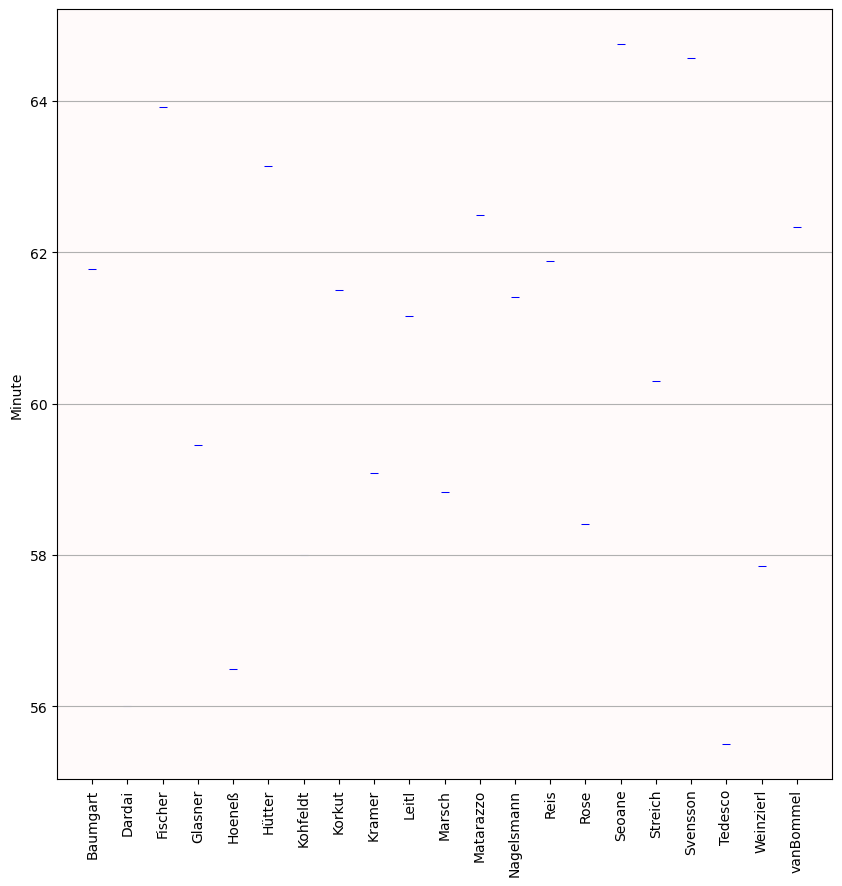

In [41]:
fig = plt.figure(figsize=(10,10))
v1 = sns.scatterplot(data=coach_data, x="Name", y="Subs_1_Avg_Min", marker ='_', color ='b')
v1.set_xticklabels(labels=coach_data.Name, rotation=90)
v1.set_xlabel('')
v1.set_ylabel('Minute')
plt.grid(axis = 'y')

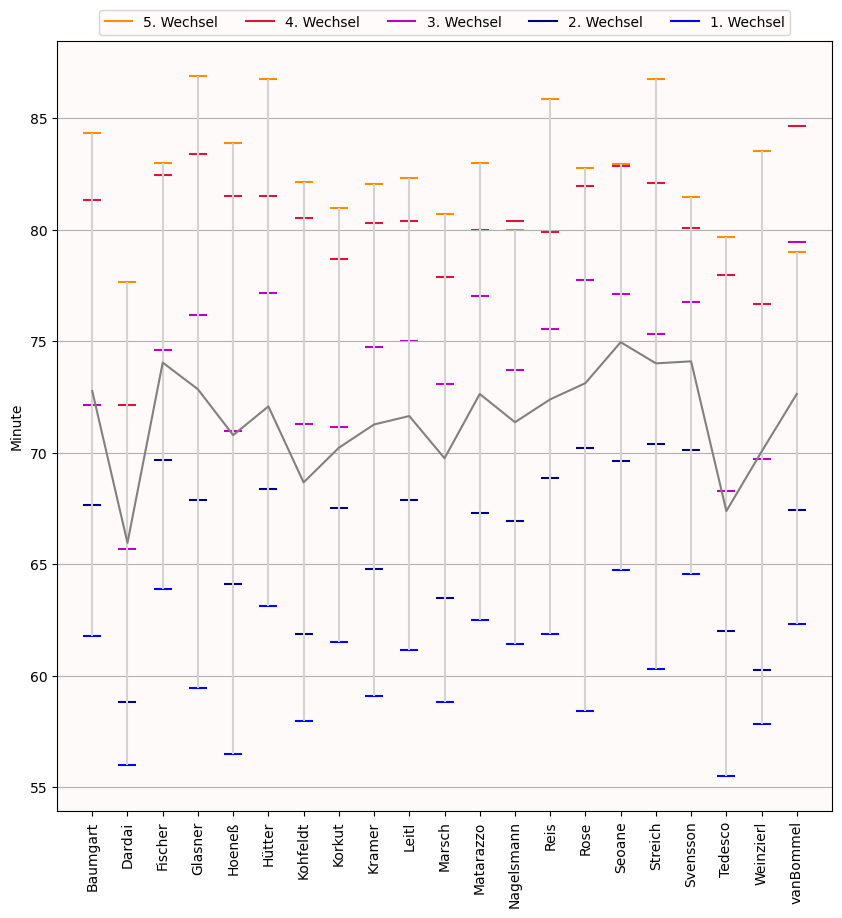

In [42]:
# plot average minute of substitution per substitution (and in general) per coach
fig = plt.figure(figsize=(10,10))

plt.rcParams['axes.facecolor'] = "snow"

plt.vlines(coach_data.Name, ymin=coach_data.Subs_1_Avg_Min, ymax=coach_data.Subs_5_Avg_Min, colors="lightgrey")
v1 = plt.scatter(data=coach_data, x="Name", y="Subs_1_Avg_Min",marker='_', s=150, color='b')
plt.scatter(coach_data.Name, coach_data.Subs_2_Avg_Min,marker='_', s=150, color='navy')
plt.scatter(coach_data.Name, coach_data.Subs_3_Avg_Min,marker='_', s=150, color='m')
plt.scatter(coach_data.Name, coach_data.Subs_4_Avg_Min,marker='_', s=150, color='crimson')
plt.scatter(coach_data.Name, coach_data.Subs_5_Avg_Min,marker='_', s=150, color='darkorange')
plt.plot(coach_data.Name, coach_data.Avg_Min, '-', color= "grey")


plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Minute')
plt.grid(axis="y")

first = mlines.Line2D([],[],color='b', label='1. Wechsel')
second = mlines.Line2D([],[],color='navy', label='2. Wechsel')
third = mlines.Line2D([],[],color='m', label='3. Wechsel')
fourth = mlines.Line2D([],[],color='crimson', label='4. Wechsel')
fifth = mlines.Line2D([],[],color='darkorange', label='5. Wechsel')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=5, handles=(fifth, fourth, third, second, first))
plt.savefig('avg_sub_time.png')

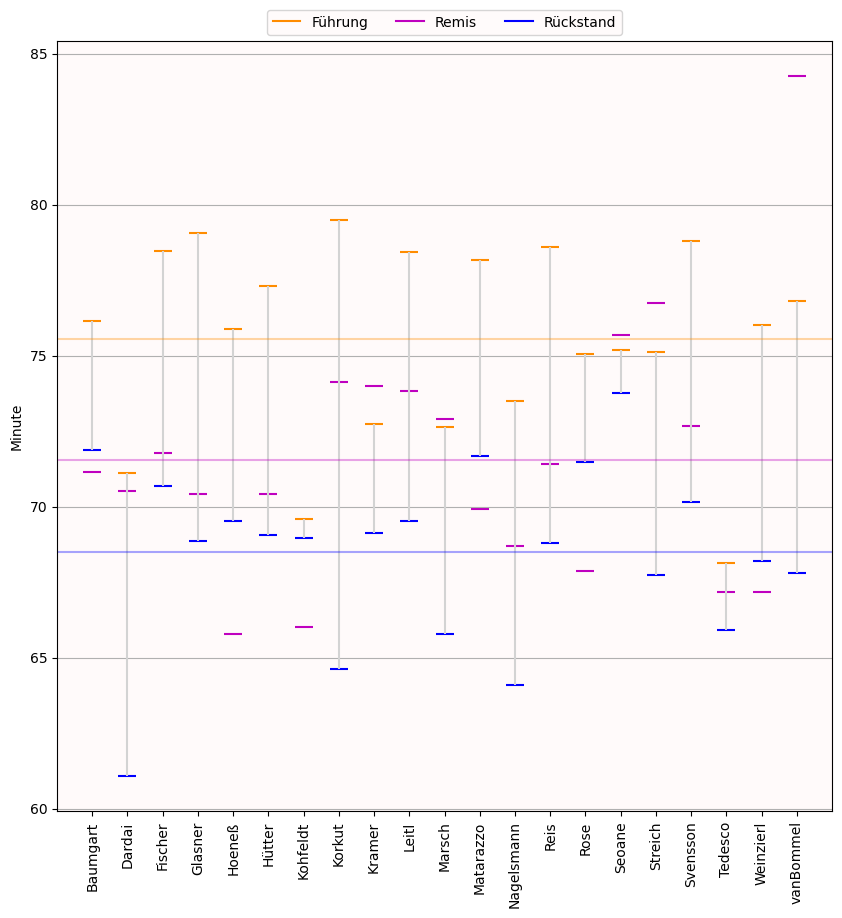

In [43]:
# plot average substitution minute per game state (per coach and in general)
fig = plt.figure(figsize=(10,10))

plt.rcParams['axes.facecolor'] = "snow"

plt.vlines(coach_data.Name, ymin=coach_data.Subs_Loosing_Avg_Min, ymax=coach_data.Subs_Leading_Avg_Min, colors="lightgrey")
v1 = plt.scatter(data=coach_data, x="Name", y="Subs_Loosing_Avg_Min",marker='_', s=150, color='b')
plt.scatter(coach_data.Name, coach_data.Subs_Drawing_Avg_Min,marker='_', s=150, color='m')
plt.scatter(coach_data.Name, coach_data.Subs_Leading_Avg_Min,marker='_', s=150, color='darkorange')
#plt.plot(coach_data.Name, coach_data.Subs_Leading_Avg_Min, '-', color= "darkorange", alpha= 0.5)
plt.axhline(np.mean(coach_data.Subs_Leading_Avg_Min), linestyle='-', color= "darkorange", alpha= 0.35)
plt.axhline(np.mean(coach_data.Subs_Drawing_Avg_Min), linestyle='-', color= "m", alpha= 0.35)
plt.axhline(np.mean(coach_data.Subs_Loosing_Avg_Min), linestyle='-', color= "b", alpha= 0.35)

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Minute')
plt.grid(axis="y")

first = mlines.Line2D([],[],color='b', label='Rückstand')
third = mlines.Line2D([],[],color='m', label='Remis')
fifth = mlines.Line2D([],[],color='darkorange', label='Führung')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=5, handles=(fifth, third, first))
plt.savefig('pts_sub_time.png')